In [1]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')

In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 12)

###### Overview   
Merged the train and test data.

Removed the 'ticket' and 'cabin' attributes.

Moved the 'Survived' attribute to the last column.

Filled the missing values in 'Age' and 'Fare' attributes with the median of the data.

###### Merging the train and test data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [7]:
df = pd.concat([train, test])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(1309, 12)

###### Remove the 'ticket' and 'cabin' attributes

In [9]:
df.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


###### Moved the 'Survived' attribute to the last column

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
df = df[['PassengerId','Pclass','Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']]
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


datatypes of the individual columns

In [12]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Survived         int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1308 non-null float64
Embarked       1307 non-null object
Survived       1309 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 112.5+ KB


summary statistics of the numerical columns

In [14]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.377387
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.484918
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


###### Handling Missing Data
Filled the missing values in 'Age' and 'Fare' attributes with the median of the data.

In [15]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
Survived         0
dtype: int64

Finding Percentage of total Missing Data

In [16]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_of_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_of_missing], axis=1, keys=['Total_Missing_Data', 'Percent_Of_Missing'])
missing_data

,Total_Missing_Data,Percent_Of_Missing
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Survived,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
PassengerId,0,0.000000


In [17]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [18]:
df['Fare'].fillna(method = 'ffill', inplace = True)

In [19]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Survived       0
dtype: int64

##### Visualization

In [20]:
df['Survived'][df['Sex'] == 'male'].value_counts()

0    734
1    109
Name: Survived, dtype: int64

In [21]:
df['Survived'][df['Sex'] == 'female'].value_counts()

1    385
0     81
Name: Survived, dtype: int64

Total Number of Male and Female Passengers

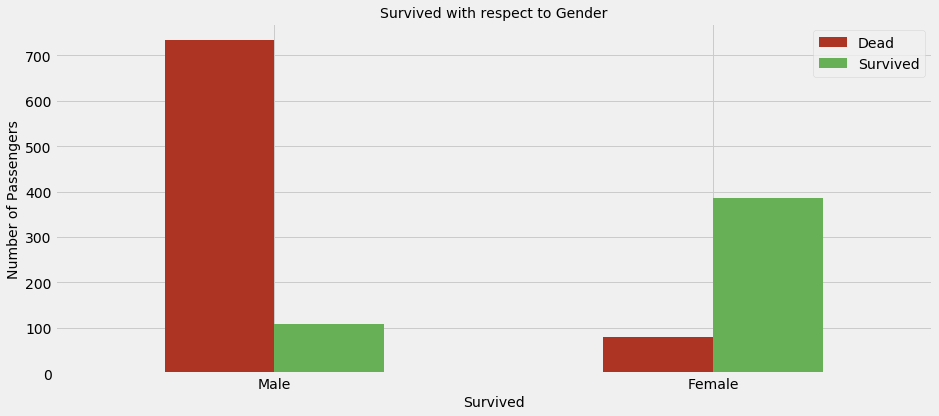

In [29]:
male = df['Survived'][df['Sex'] == 'male'].value_counts()
female = df['Survived'][df['Sex'] == 'female'].value_counts()
gender = pd.DataFrame([male, female])
gender.index = ['Male','Female']

gender.plot(kind = 'bar', rot = 0, color = ['#ad3323' ,'#67b056'])
plt.title('Survived with respect to Gender', fontsize = 14)
plt.ylabel('Number of Passengers', fontsize = 14)
plt.xlabel('Survived', fontsize = 14)
plt.legend(['Dead', 'Survived'])
plt.show()

In [30]:
df[df['Survived'] == 1]['Sex'].value_counts()

female    385
male      109
Name: Sex, dtype: int64

In [31]:
df[df['Survived'] == 0]['Sex'].value_counts()

male      734
female     81
Name: Sex, dtype: int64

Number of Only Survived Male and Female Passengers

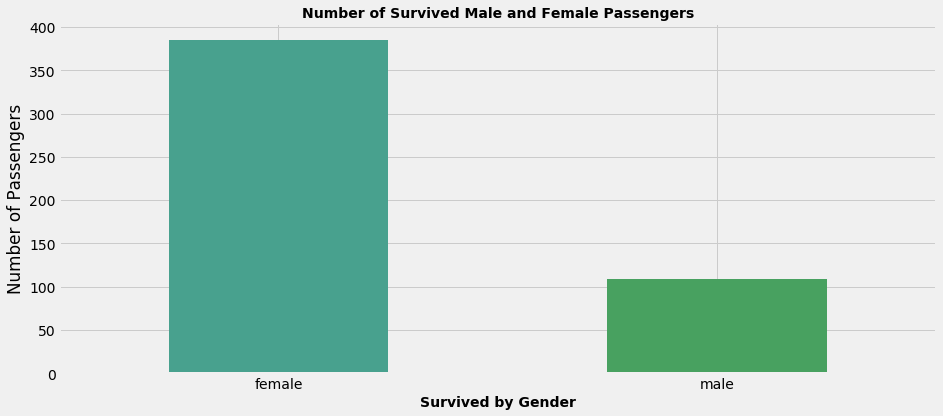

In [32]:
df[df['Survived'] == 1]['Sex'].value_counts().plot(kind = 'bar', rot = 0, color = ['#48a18e', '#48a160'])

plt.title('Number of Survived Male and Female Passengers', fontdict = {'fontweight':'bold', 'fontsize':14})
plt.xlabel('Survived by Gender', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Number of Passengers')
plt.show()

Number of Died Passengers by Male and Female

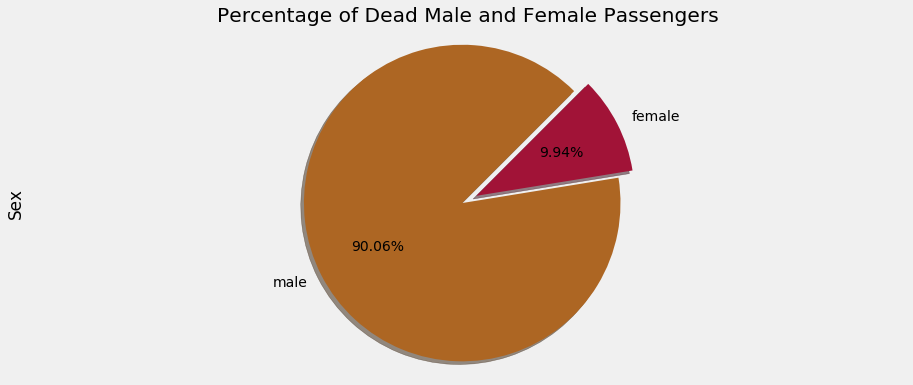

In [33]:
explode = (0, 0.1)

df[df['Survived'] == 0]['Sex'].value_counts().plot.pie(autopct = '%1.2f%%', shadow = True, startangle= 45, 
                                                        explode = explode, colors = ['#ad6623', '#a11337'])
plt.axis('equal')
plt.title('Percentage of Dead Male and Female Passengers')
plt.show()

Total Passengers of Different Ages

In [35]:
sex_age = df.groupby('Sex').Age.count()
sex_age

Sex
female    466
male      843
Name: Age, dtype: int64

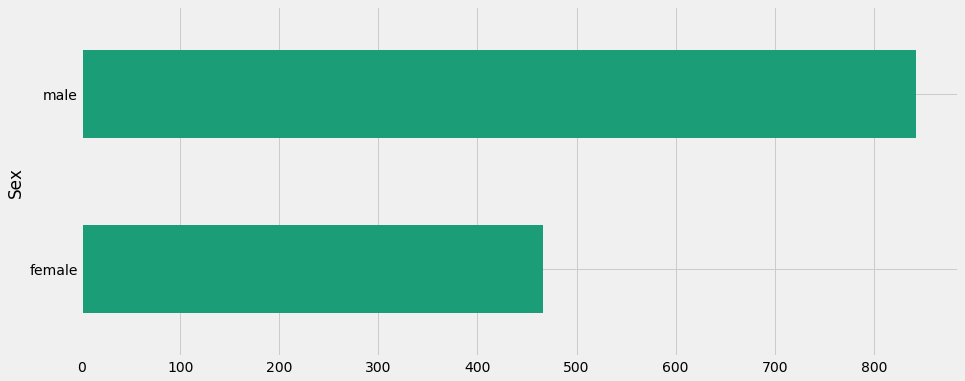

In [48]:
sex_age.plot(kind = 'barh', cmap = 'Dark2', rot = 0)

In [49]:
df.groupby('Sex').Age.mean()

Sex
female    28.886950
male      30.430712
Name: Age, dtype: float64

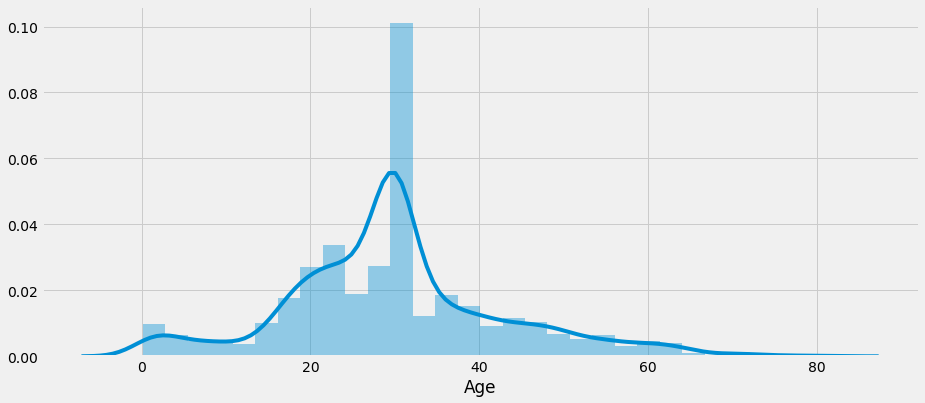

In [50]:
sb.distplot(df.Age, bins =30)
plt.show()

Number of Survied Passengers by Embarked Category

In [51]:
df['Embarked'][df['Survived']].value_counts()

S    1309
Q     815
C     494
Name: Embarked, dtype: int64

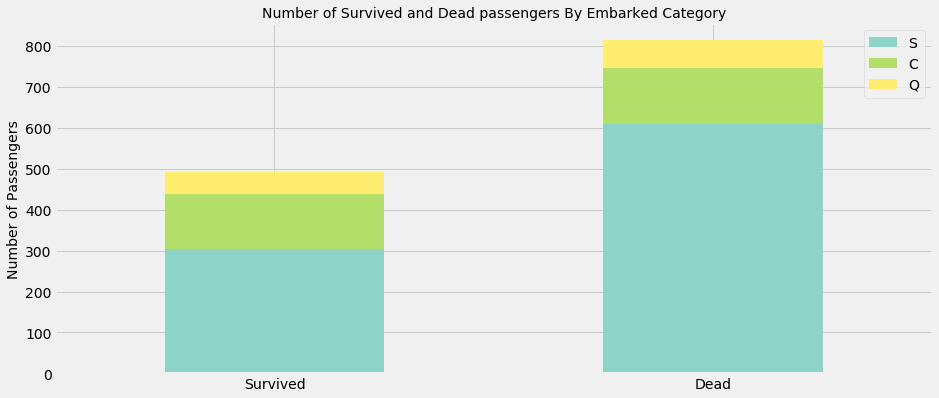

In [53]:
survived_embark = df[df['Survived'] == 1]['Embarked'].value_counts()
dead_embark = df[df['Survived'] == 0]['Embarked'].value_counts()
embarked = pd.DataFrame([survived_embark,dead_embark])
embarked.index = ['Survived','Dead']

embarked.plot(kind='bar', stacked=True, cmap = 'Set3', rot = 0)
plt.title('Number of Survived and Dead passengers By Embarked Category', fontsize = 14)
plt.ylabel('Number of Passengers', fontsize = 14)
plt.show()

Only Survived people by Embarked

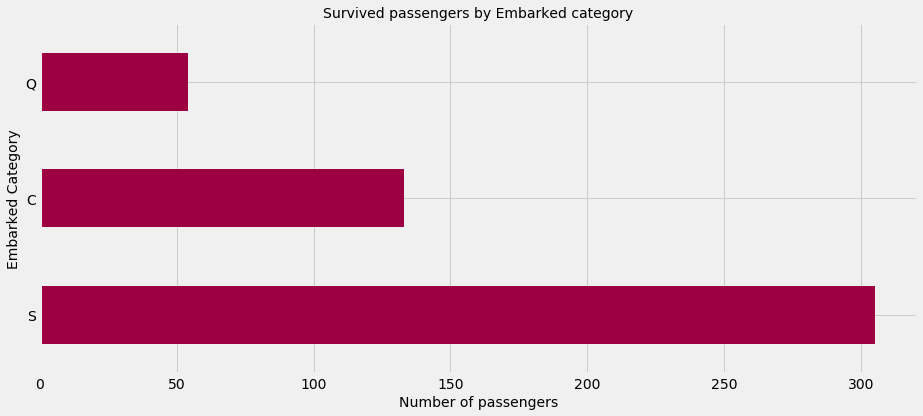

In [54]:
df['Embarked'][df['Survived'] == 1].value_counts().plot(kind = 'barh', cmap = 'Spectral')
plt.title('Survived passengers by Embarked category', fontsize = 14)
plt.ylabel('Embarked Category', fontsize = 14)
plt.xlabel('Number of passengers', fontsize = 14)
plt.show()

Dead and Survived Passengers By Age

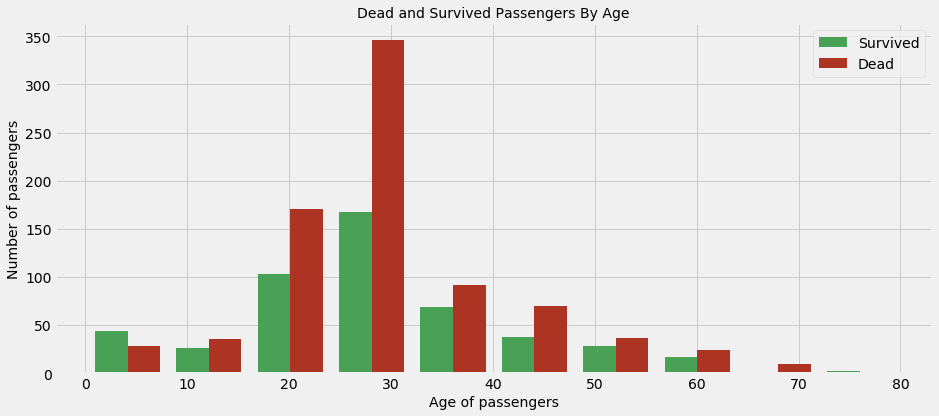

In [55]:
plt.hist([df[df['Survived'] == 1]['Age'], df[df['Survived'] == 0]['Age']], color = ['#48a154', '#ad3323'],
             bins = 10,label = ['Survived','Dead'])

plt.title('Dead and Survived Passengers By Age', fontsize = 14)
plt.xlabel('Age of passengers', fontsize = 14)
plt.ylabel('Number of passengers', fontsize = 14)
plt.legend()
plt.show()

Fare and Age versus Survival 

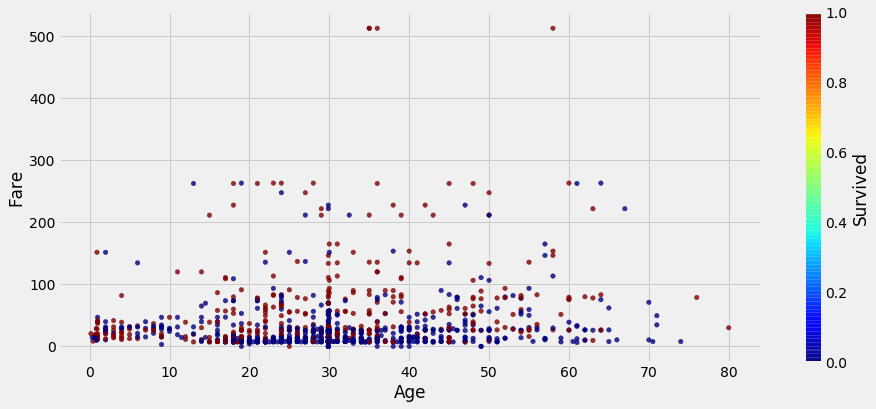

In [56]:
df.plot.scatter('Age','Fare', c = 'Survived', cmap='jet', alpha = 0.8)
plt.show()

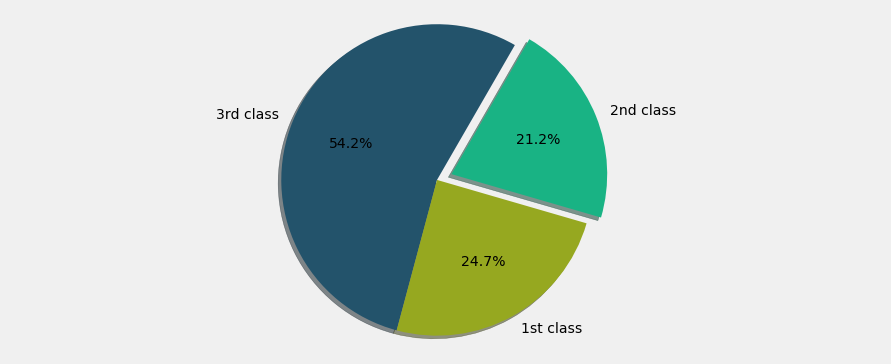

In [67]:
labels= '3rd class', '1st class','2nd class'
colors=['#23536b','#96a820','#19b384']
explode = (0, 0, 0.1)

ax = df.Pclass.value_counts()
plt.pie(ax, labels = labels, colors = colors, autopct ='%1.1f%%', shadow=True, explode = explode, startangle= 60)
plt.axis('equal')
plt.show()

Only Survived Passengers By Pclass category

In [64]:
df[df['Survived'] == 1]['Pclass'].value_counts()

3    191
1    186
2    117
Name: Pclass, dtype: int64

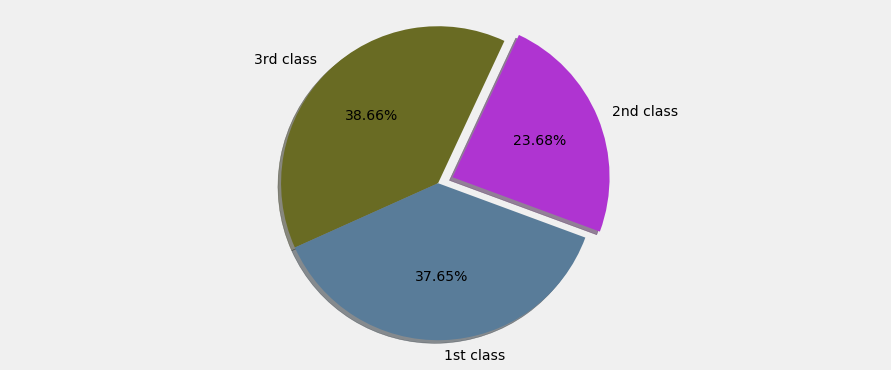

In [68]:
pclass = df[df['Survived'] == 1]['Pclass'].value_counts()

labels= '3rd class', '1st class','2nd class'
colors=['#696b23','#597c99','#af34d1']
explode = (0, 0, 0.1)

#ax = df.Pclass.value_counts()
plt.pie(pclass, labels = labels, colors = colors, autopct ='%1.2f%%', shadow=True, explode = explode, startangle= 65)
plt.axis('equal')
plt.show()